In [1]:
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


In [11]:
def Explore(DF):
    print(DF.describe())
    print(DF.shape)
    plt.figure()
    sns.heatmap(DF.corr() ,annot=True)

    plt.show()
def GenerateDataFrame():
    data=load_boston()
    print(data.data)
    print(data.feature_names)
    return train_test_split(pd.DataFrame(data=data.data,columns=data.feature_names),pd.DataFrame(data=data.target,columns=['Target']),test_size=.3)
import numpy as np
import copy
def FindBetas(Xa,y):
    #(X^TX)^{-1}X^Ty
    #we have to add the intercept with ones in the first col
    X=Xa.copy()
    X['intercept']=1
    
    
    XT=X.T
    M=XT.dot(X)
    #print(M)
    A=pd.DataFrame(np.linalg.pinv(M.values),columns=M.columns)
    print('A shaoe',A.shape)
    print('XT  shape ',XT.shape)
    print('y ',y.shape)
    betas=A.dot(XT).dot(y)
    print('betas shaoe ',betas.shape)
    return betas
    

In [12]:
x_train,x_test,y_train,y_test=GenerateDataFrame()

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:

Betas=FindBetas(x_train[['LSTAT']],y_train)
Betas.head()


A shaoe (2, 2)
XT  shape  (2, 354)
y  (354, 1)
betas shaoe  (2, 1)


,Target
0,-0.899365
1,33.846310


In [32]:
def ploting(x,y,color):
    plt.figure
    plt.plot(x,y,color)
    plt.show()

In [41]:
def Predict(betas,xa,list_vars):
    x=xa.copy()
    x['intercept']=1
    return x.dot(np.array(betas))



In [42]:
y_train_pred=Predict(Betas,x_train[['LSTAT']],['LSTAT'])
    

In [47]:
y_val_pred=Predict(Betas,x_test[['LSTAT']],['LSTAT'])

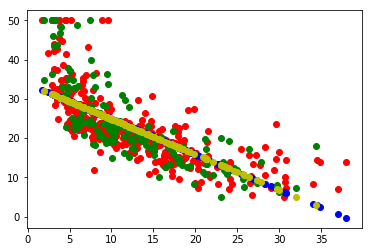

In [48]:
    plt.figure
    plt.plot(x_train[['LSTAT']],y_train,'ro')
    plt.plot(x_train[['LSTAT']],y_train_pred,'bo')
    plt.plot(x_test[['LSTAT']],y_test,'go')
    plt.plot(x_test[['LSTAT']],y_val_pred,'yo')
    plt.show()

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
import math

In [53]:
rmse_train=math.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_train

6.151783815011356

In [54]:
rmse_val=math.sqrt(mean_squared_error(y_test,y_val_pred))
rmse_val

6.357662916558489

In [55]:
print('r2 score train',r2_score(y_train,y_train_pred))
print('r2 score test',r2_score(y_test,y_val_pred))

r2 score train 0.5244082420291356
r2 score test 0.5776620028386295
